# My sequence

In [1]:

import sys
sys.path.append('..')
from assignment3.iteration import EMProcess
from assignment3.evaluator import Evaluator
from assignment3.utils import *


In [2]:

files = ['../data/my.fasta']
sequences = get_seqs_from_files(files)
k = 5
background = [0.25]*4
pseudo_counts = get_pseudo_count_vector()
print('pseudo_counts = ', pseudo_counts)

pseudo_counts =  [0.0625, 0.0625, 0.0625, 0.0625]


# EM

In [3]:

process = EMProcess(sequences, k , background)
seeds = get_seed_kmers(sequences[0] ,k)
process.initialize(seeds[0],pseudo_counts)

for i in range(3):
    process.iterate()


# Plot Scores
To use this as a "gold standard" against which to evaluate a motif, you scan each sequence with your motif WMM, scoring each of the 113-k+1 potential start positions.

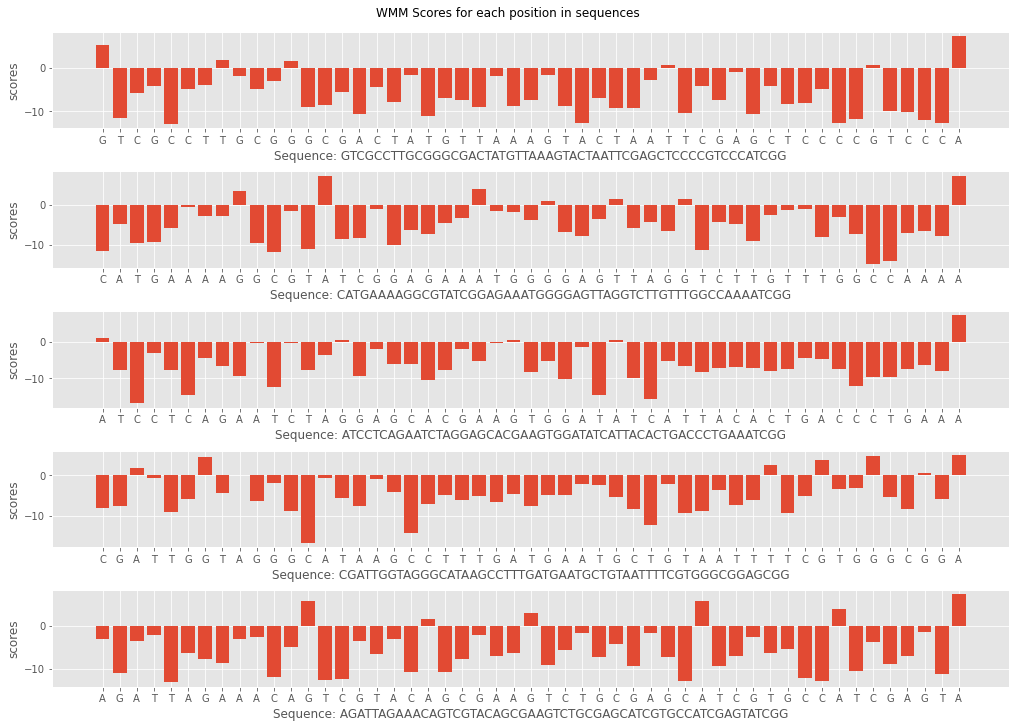

In [4]:
test_seq = sequences
eval = Evaluator(process.wmm, test_seq)

eval.plot_results()

# combine scores and create y_true. Calculate ROC

gold_start, gold_end =  49 53
Gold sequence =  ATCGG
Most common location of the best motif hit in each sequence = 51


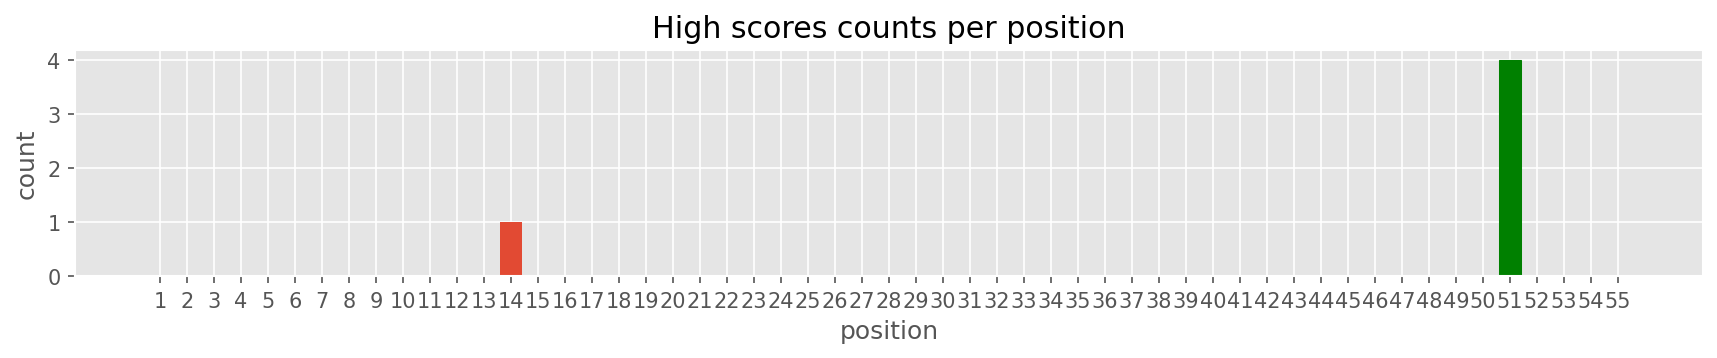

In [7]:
motif_pos = 51
gold_start, gold_end = eval.get_gold_positions(motif_pos, k)
print('gold_start, gold_end = ',gold_start, gold_end)
print('Gold sequence = ',sequences[0][50:51+k])
eval.plot_highscore_histogram(gold_start, gold_end)

# ROC Plot

In [8]:
y_score, y_true = eval.get_y(motif_pos)

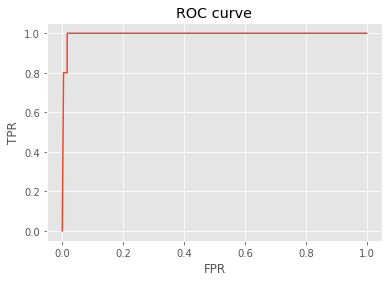

In [9]:
from assignment3.roc import ROC
r = ROC(y_true, y_score)
r.plot_roc()

In [10]:
print(f'AUC = {r.calculateAUC()}')

AUC = 0.9952


In [11]:
print('Thresholds',r.thresholds)
print('TPR',r.tprs)

Thresholds [  8.29453391   7.29453391   5.33473152   5.09917958   0.56586515
   0.48501398  -1.48716505  -1.50117998  -1.92040653  -1.98694636
  -2.93178967  -3.04941735  -4.19008533  -4.24243389  -4.62076861
  -4.73263041  -6.28012714  -6.28281097  -6.40423024  -6.42894826
  -7.2649607   -7.31951183  -7.76626361  -7.76681972  -7.86131301
  -7.86617676  -8.26167131  -8.41199349  -9.15846749  -9.23713972
  -9.26228005  -9.30367955  -9.31847041  -9.32851591  -9.49701668
  -9.56961862 -10.07698619 -10.38815691 -11.14812066 -11.15298441
 -11.95319264 -11.99240857 -12.63758233 -12.74524738 -16.82469894]
TPR [0.  0.8 0.8 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1. ]


In [12]:
t = r.largest_thres_TPR1()
print(f'Largest Threshold for TPR 1 = {t:.3f}')

Largest Threshold for TPR 1 = 5.099


In [13]:
tp, fp, tn, fn = r.get_TP_FP_TN_FN(t)
print('At threshold {:.3f} tp = {}, fp = {}, tn = {}, fn = {}'.format(t, tp, fp, tn, fn))

At threshold 5.099 tp = 5, fp = 4, tn = 246, fn = 0
